> 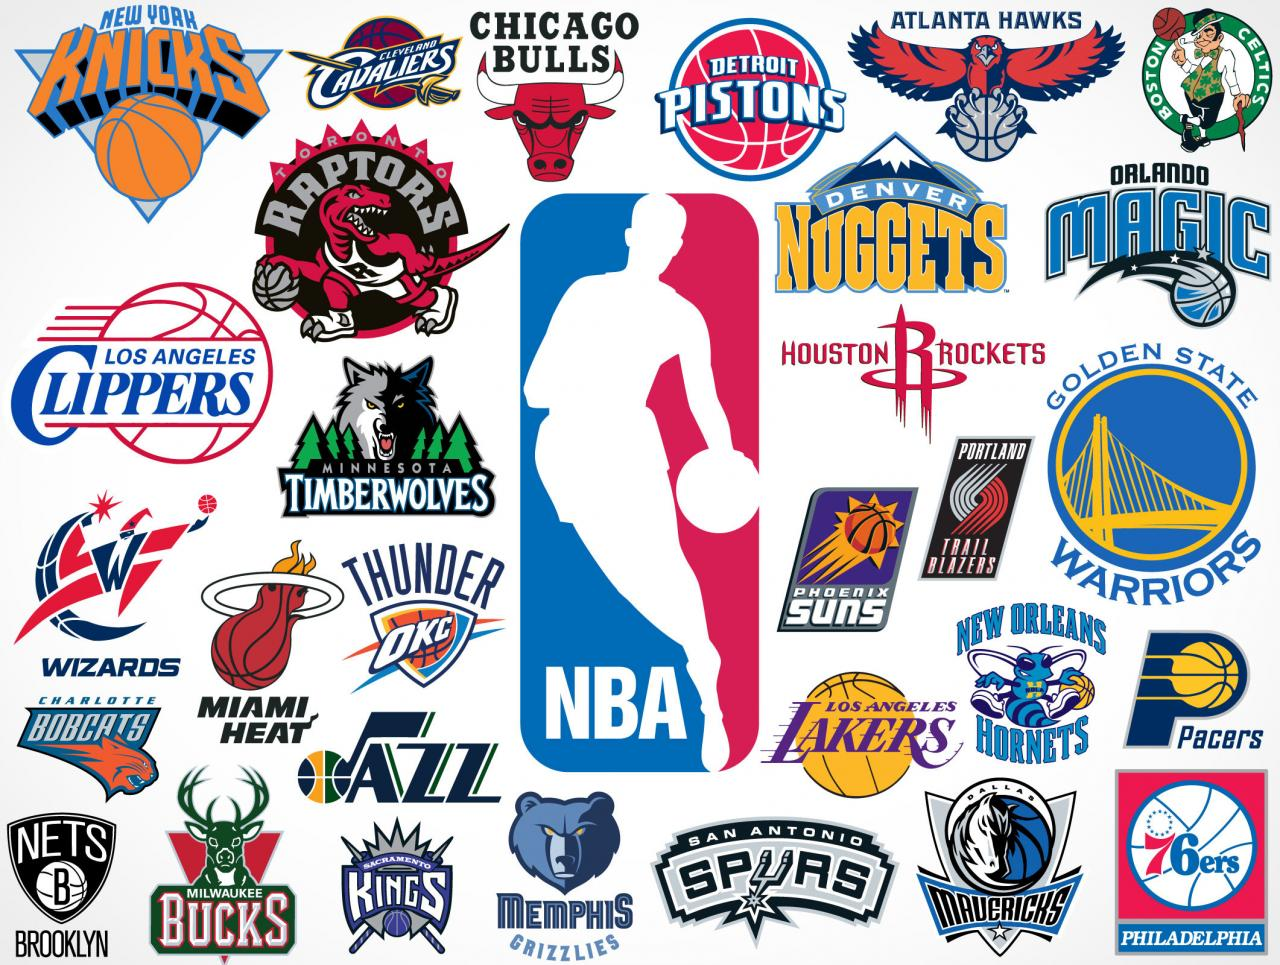        Image - https://wallpaperaccess.com/nba-teams

#                           NBA Prediction using Neural Network and Logistic Regression

## PART A - Simple Neural Net Model on Data

### 1. Importing all the necessary packages

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
from pandas import read_csv

import numpy as np
from numpy import mean

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from matplotlib import pyplot
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras import optimizers
from keras import regularizers

import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-7144cd6f778e>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


### 2. Loading Data 

#### *Dataset is taken from Kaggle NBA dataset.* 

#### *Link - "https://www.kaggle.com/pablote/nba-enhanced-stats"*

In [2]:
# Data loading and Preview

dataframe = read_csv('../Data/dataset/2012-18_officialBoxScore.csv')
dataframe

,gmDate,gmTime,seasTyp,offLNm,offFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,teamMin,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptMin,opptDayOff,opptPTS,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Smith,Michael,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
2,2012-10-30,19:00,Regular,Workman,Haywoode,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
3,2012-10-30,19:00,Regular,Brothers,Tony,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,46.1538,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,46.1538,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
4,2012-10-30,19:00,Regular,Smith,Michael,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,46.1538,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,4

### 3. Data Remodelling

#### *Data Modification for making data usable for our Neural network* 

In [3]:
# Each game have 3 Rows for Home and Away each
# Removing the duplicate lines for Home and Away 

df = dataframe.iloc[::3, :].reset_index(drop = True)
# df

In [4]:
# Printing the abbriviations and count of Teams in the Data, just for validation.

length = df['teamAbbr'].unique()
len(length)

30

In [5]:
# Checking null values in the dataset

df.isnull()
df.isnull().values.any()

False

In [6]:
# Removing the extra rows per match for opponent

game_data = df[1::2].reset_index(drop=True)
# game_data

In [7]:
# Selecting the necessary columns only [Result + Home[17] + Away[17]]

game_data.columns = map(str.upper, game_data.columns)
game_data['TEAMRSLT'] = game_data.apply(lambda x: 1 if x['TEAMRSLT'] == 'Win' else 0, axis=1)
columns = ['TEAMRSLT', 'TEAMFGM', 'TEAMFGA', 'TEAMFG%', 'TEAM3PM', 'TEAM3PA', 'TEAM3P%', 'TEAMFTM',
           'TEAMFTA', 'TEAMFT%', 'TEAMORB', 'TEAMDRB', 'TEAMTRB', 'TEAMAST', 'TEAMTO%', 'TEAMSTL',
           'TEAMBLK', 'TEAMPF', 'OPPTFGM', 'OPPTFGA', 'OPPTFG%', 'OPPT3PM', 'OPPT3PA', 
           'OPPT3P%', 'OPPTFTM', 'OPPTFTA', 'OPPTFT%', 'OPPTORB', 'OPPTDRB', 'OPPTTRB', 'OPPTAST', 'OPPTTO%',
           'OPPTSTL', 'OPPTBLK', 'OPPTPF']
game_data = game_data.filter(columns)
game_data

,TEAMRSLT,TEAMFGM,TEAMFGA,TEAMFG%,TEAM3PM,TEAM3PA,TEAM3P%,TEAMFTM,TEAMFTA,TEAMFT%,TEAMORB,TEAMDRB,TEAMTRB,TEAMAST,TEAMTO%,TEAMSTL,TEAMBLK,TEAMPF,OPPTFGM,OPPTFGA,OPPTFG%,OPPT3PM,OPPT3PA,OPPT3P%,OPPTFTM,OPPTFTA,OPPTFT%,OPPTORB,OPPTDRB,OPPTTRB,OPPTAST,OPPTTO%,OPPTSTL,OPPTBLK,OPPTPF
0,1,36,79,0.4557,7,20,0.3500,15,22,0.6818,18,36,54,22,19.1466,7,5,21,32,90,0.3556,8,32,0.2500,12,20,0.6000,18,21,39,26,11.6279,11,10,19
1,1,43,79,0.5443,8,16,0.5000,26,32,0.8125,5,31,36,25,7.9145,8,5,20,39,75,0.5200,6,13,0.4615,23,28,0.8214,7,34,41,24,15.4859,4,2,23
2,0,38,77,0.4935,3,13,0.2308,12,31,0.3871,15,31,46,24,13.3792,6,5,21,40,85,0.4706,5,15,0.3333,14,18,0.7778,9,31,40,22,11.4373,9,5,25
3,1,30,85,0.3529,7,25,0.2800,17,21,0.8095,14,33,47,18,14.5138,13,11,14,33,88,0.3750,4,18,0.2222,5,11,0.4545,16,38,54,19,19.1571,9,5,22
4,0,33,91,0.3626,6,17,0.3529,16,19,0.8421,15,27,42,18,9.1441,12,8,18,37,78,0.4744,5,11,0.4545,11,16,0.6875,9,37,46,22,18.2622,3,10,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,1,33,77,0.4286,13,32,0.4063,22,27,0.8148,6,36,42,20,15.2555,6,7,27,33,95,0.3474,10,34,0.2941,16,27,0.5926,18,32,50,17,10.0942,5,1,25
7377,1,52,105,0.4952,15,36,0.4167,11,15,0.7333,17,40,57,35,9.7087,15,7,17,37,90,0.4111,7,25,0.2800,14,16,0.8750,10,33,43,22,17.0882,6,5,17
7378,0,41,83,0.4940,6,18,0.3333,12,28,0.4286,8,33,41,27,15.1353,8,1,17,42,88,0.4773,17,39,0.4359,14,16,0.8750,10,39,49,25,15.1732,8,6,23
7379,1,41,89,0.4607,9,24,0.3750,11,16,0.6875,7,39,46,19,9.4304,9,9,22,33,89,0.3708,8,23,0.3478,19,24,0.7917,14,39,53,18,13.0936,5,7,19


#### *Data Modelling done - We are good to use the Data for our Models*

In [8]:
# Selecting the input and label for the data

game_data_x = game_data.drop(columns=['TEAMRSLT'])
game_data_y = game_data['TEAMRSLT']

### 4.Splitting the Data into Training and Test set

In [9]:
# Choosing test_size = 0.068 to make validation set near 500 rows
x_train, x_test, y_train, y_test = train_test_split(game_data_x, game_data_y, test_size=0.068, random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6879, 34)
(6879,)
(502, 34)
(502,)


### 5. Model creation and Training

#### *Creating Multiple Models and Training on above dataset*

#### <ins>Model 1 - K Neighbour Classifier</ins>

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

metrics.accuracy_score(y_test, knn_pred)

0.8725099601593626

#### <ins>Model 2 - Linear Support Vector Classification</ins> 

In [11]:
svc_linear = LinearSVC()
svc_linear.fit(x_train, y_train)
pred_svc = svc_linear.predict(x_test)

metrics.accuracy_score(y_test, pred_svc)

1.0

#### <ins>Model 3 - Multilayer Perceptron</ins>

In [12]:
MLP_classifier = MLPClassifier()
MLP_classifier = MLP_classifier.fit(x_train, y_train)
pred_MLP_classifier = MLP_classifier.predict(x_test)

metrics.accuracy_score(y_test, pred_MLP_classifier)

1.0

### 6. Done - Accuracy 99%

#### *Awesome results -  MLP have almost 99% Accuracy. WoW !! ✌🏽*

In [13]:
# Let's Try to Implement the Model in real world 

#### *Let's check what are the Data fields we need to Predict the outcome of future games.*

#### *Lets check the Columns we have in our Data :-*

In [14]:
game_data_x

,TEAMFGM,TEAMFGA,TEAMFG%,TEAM3PM,TEAM3PA,TEAM3P%,TEAMFTM,TEAMFTA,TEAMFT%,TEAMORB,TEAMDRB,TEAMTRB,TEAMAST,TEAMTO%,TEAMSTL,TEAMBLK,TEAMPF,OPPTFGM,OPPTFGA,OPPTFG%,OPPT3PM,OPPT3PA,OPPT3P%,OPPTFTM,OPPTFTA,OPPTFT%,OPPTORB,OPPTDRB,OPPTTRB,OPPTAST,OPPTTO%,OPPTSTL,OPPTBLK,OPPTPF
0,36,79,0.4557,7,20,0.3500,15,22,0.6818,18,36,54,22,19.1466,7,5,21,32,90,0.3556,8,32,0.2500,12,20,0.6000,18,21,39,26,11.6279,11,10,19
1,43,79,0.5443,8,16,0.5000,26,32,0.8125,5,31,36,25,7.9145,8,5,20,39,75,0.5200,6,13,0.4615,23,28,0.8214,7,34,41,24,15.4859,4,2,23
2,38,77,0.4935,3,13,0.2308,12,31,0.3871,15,31,46,24,13.3792,6,5,21,40,85,0.4706,5,15,0.3333,14,18,0.7778,9,31,40,22,11.4373,9,5,25
3,30,85,0.3529,7,25,0.2800,17,21,0.8095,14,33,47,18,14.5138,13,11,14,33,88,0.3750,4,18,0.2222,5,11,0.4545,16,38,54,19,19.1571,9,5,22
4,33,91,0.3626,6,17,0.3529,16,19,0.8421,15,27,42,18,9.1441,12,8,18,37,78,0.4744,5,11,0.4545,11,16,0.6875,9,37,46,22,18.2622,3,10,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,33,77,0.4286,13,32,0.4063,22,27,0.8148,6,36,42,20,15.2555,6,7,27,33,95,0.3474,10,34,0.2941,16,27,0.5926,18,32,50,17,10.0942,5,1,25
7377,52,105,0.4952,15,36,0.4167,11,15,0.7333,17,40,57,35,9.7087,15,7,17,37,90,0.4111,7,25,0.2800,14,16,0.8750,10,33,43,22,17.0882,6,5,17
7378,41,83,0.4940,6,18,0.3333,12,28,0.4286,8,33,41,27,15.1353,8,1,17,42,88,0.4773,17,39,0.4359,14,16,0.8750,10,39,49,25,15.1732,8,6,23
7379,41,89,0.4607,9,24,0.3750,11,16,0.6875,7,39,46,19,9.4304,9,9,22,33,89,0.3708,8,23,0.3478,19,24,0.7917,14,39,53,18,13.0936,5,7,19


#### Columns : -

TEAMFGM - Team / Opponent Field Goal Made - OPPTFGM

TEAMFGA  - Team / Opponent Field Goal Attempt - OPPTFGA

TEAMFG% - Team / Opponent Field Goal % - OPPTFG%

TEAM3PM - Team / Opponent 3 Pointer's Made - OPPT3PM

TEAM3PA - Team / Opponent 3 Pointer's Attempt - OPPT3PA

TEAM3P% - Team / Opponent 3 Pointer's % - OPPT3P%

TEAMFTM - Team / Opponent Free Throw Made - OPPTFTM

TEAMFTA - Team / Opponent Free Throw Attempt - OPPTFTA

TEAMFT% - Team / Opponent Free Throw % - OPPTFT%

TEAMORB - Team / Opponent Offensive Rebound - OPPTORB

TEAMDRB - Team / Opponent Defensive Rebound - OPPTDRB

TEAMTRB - Team / Opponent Total Rebound - OPPTTRB

TEAMAST - Team / Opponent Assist - OPPTAST

TEAMTO% - Team / OpponentTurnover % - OPPTTO%

TEAMSTL - Team / Opponent Steals - OPPTSTL

TEAMBLK - Team / Opponent Blocks - OPPTBLK

TEAMPF   - Team / Opponent Personal Fouls - OPPTPF

#### <ins>Now what  to do ???</ins> 🤔

#### *Problem - Data available for the match is post game data so for future games how to get these stats if the game is not yet played*

#### *Solution - Convert the data as a Mean of stats from previous game for the Teams playing the Match*

#### *Mean of previous 5 Games for both the team - Home and Away*

## PART B - Converting the Data as Mean of Previous 5 games for each team

### 1. Loading the data 

#### *Using the RAW data we have previously as df, where we had 2 Rows per game and total 14762 Rows.*

In [15]:
# Print the origional data
df

,gmDate,gmTime,seasTyp,offLNm,offFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,teamMin,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptMin,opptDayOff,opptPTS,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.000,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Brothers,Tony,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,46.1538,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,46.1538,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.250,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
2,2012-10-30,20:00,Regular,McCutchen,Monty,BOS,East,Atlantic,Away,Loss,240,0,107,24,16,4,2,23,75,39,0.5200,62,33,0.5323,13,6,0.4615,28,23,0.8214,7,34,41,25,29,22,31,0,0,0,0,53.2468,61.5385,0.6127,0.5600,18.4211,87.1795,15.4859,4.2113,2.1056,3.2258,1.4267,75.25,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,MIA,East,Southeast,Home,Win,240,0,120,25,8,8,5,20,79,43,0.5443,63,35,0.5556,16,8,0.5000,32,26,0.8125,5,31,36,31,31,31,27,0,0,0,0,46.7532,58.1395,0.6446,0.5949,13.8889,86.1111,7.9145,8.4225,5.2641,7.9365,1.5190,97.000,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
3,2012-10-30,20:00,Regular,McCutchen,Monty,MIA,East,Southeast,Home,Win,240,0,120,25,8,8,5,20,79,43,0.5443,63,35,0.5556,16,8,0.5000,32,26,0.8125,5,31,36,31,31,31,27,0,0,0,0,46.7532,58.1395,0.6446,0.5949,12.8205,81.5789,7.9145,8.4225,5.2641,7.9365,1.5190,97.00,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,BOS,East,Atlantic,Away,Loss,240,0,107,24,16,4,2,23,75,39,0.5200,62,33,0.5323,13,6,0.4615,28,23,0.8214,7,34,41,25,29,22,31,0,0,0,0,53.2468,61.5385,0.6127,0.5600,17.0732,82.9268,15.4859,4.2113,2.1056,3.2258,1.4267,75.250,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832
4,2012-10-30,22:30,Regular,Foster,Scott,DAL,West,Southwest,Away,Win,240,0,99,22,12,9,5,25,85,40,0.4706,70,35,0.5000,15,5,0.3333,18,14,0.7778,9,31,40,25,23,26,25,0,0,0,0,46.5116,55.0000,0.5327,0.5000,22.5000,67.3913,11.4373,9.8276,5.4598,7.1429,1.1647,72.25,60.2083,108.1034,99.3678,8.7356,0.4545,17.3338,1.8333,75.0000,LAL,West,Pacific,Home,Loss,240,0,91,24,14,6,5,21,77,38,0.4935,64,35,0.5469,13,3,0.2308,31,12,0.3871,15,31,46,29,17,20,25,0,0,0,0,53.4884,63.1579,0.5020,0.5130,32.6087

In [16]:
# Copying the Raw data into new variable games_stat
games_stat = df.copy()
# Columns Label are all converted to Upper 
games_stat.columns = map(str.upper, games_stat.columns)
# Assigning Team Result - Win = 1, Lose =0
games_stat['TEAMRSLT'] = games_stat.apply(lambda x: 1 if x['TEAMRSLT'] == 'Win' else 0, axis=1)

### 2. Converting the data into average data of last 5 games

In [17]:
# Assigning game id to each match as we have 2 rows for each game played
id = 1;
game_id = [];
for i in range(0, len(games_stat), 2):
    game_id.append(id)
    game_id.append(id)
    id += 1

games_stat['GAME_ID'] = game_id

In [18]:
# Assigning important columns variable seperately to be used later

importance_columns = ['TEAMFGM', 'TEAMFGA', 'TEAMFG%', 'TEAM3PM', 'TEAM3PA', 'TEAM3P%', 'TEAMFTM', 
                      'TEAMFTA', 'TEAMFT%','TEAMORB','TEAMDRB','TEAMTRB', 'TEAMAST', 'TEAMSTL', 'TEAMBLK', 'TEAMPF','TEAMTO', 
                      'OPPTFGM', 'OPPTFGA', 'OPPTFG%', 'OPPT3PM', 'OPPT3PA', 'OPPT3P%', 'OPPTFTM',
                      'OPPTFTA', 'OPPTFT%','OPPTORB','OPPTDRB','OPPTTRB', 'OPPTAST', 'OPPTSTL', 'OPPTBLK', 'OPPTPF','OPPTTO']

In [19]:
# Function for getting the mean values for all the columns in the Home and Away teams

def get_columns_mean(columns, data_frame_describe, data_frame):
    for column in columns:
        mean = data_frame_describe[column]['mean']
        data_frame[column] = round(mean, 5)

In [20]:
# Function for converting two rows per game into one row and 
# finding the mean values for all the columns from last 5 games for each team

def get_teams_mean(game_id, home_team, away_team):
    columns = ['TEAMFGM', 'TEAMFGA', 'TEAMFG%', 'TEAM3PM', 'TEAM3PA', 'TEAM3P%', 'TEAMFTM', 
                'TEAMFTA', 'TEAMFT%','TEAMORB','TEAMDRB','TEAMTRB', 'TEAMAST', 'TEAMSTL', 'TEAMBLK', 'TEAMPF','TEAMTO']
    
    opposite_column = ['OPPTFGM', 'OPPTFGA', 'OPPTFG%', 'OPPT3PM', 'OPPT3PA', 'OPPT3P%', 'OPPTFTM',
                      'OPPTFTA', 'OPPTFT%','OPPTORB','OPPTDRB','OPPTTRB', 'OPPTAST', 'OPPTSTL', 'OPPTBLK', 'OPPTPF','OPPTTO']
        
    HOME = games_stat.loc[(games_stat['GAME_ID'] < game_id) & (games_stat['TEAMABBR'] == home_team), :][-5:]
    AWAY = games_stat.loc[(games_stat['GAME_ID'] < game_id) & (games_stat['TEAMABBR'] == away_team), :][-5:]

    HOME = HOME.filter(columns)
    AWAY = AWAY.filter(columns)

    get_columns_mean(HOME.columns, HOME.describe(), HOME)
    HOME = HOME.iloc[-1:,:]

    get_columns_mean(AWAY.columns, AWAY.describe(), AWAY)
    AWAY = AWAY.iloc[-1:,:]

    rename_column = dict()
    for i in range(len(columns)):
        rename_column[columns[i]] = opposite_column[i]
    
    AWAY.rename(columns=rename_column, inplace=True)
    
    HOME['key'] = 1
    AWAY['key'] = 1
    AWAY_HOME = pd.merge(HOME, AWAY, how='outer')
    del AWAY_HOME['key']

    AWAY_HOME = AWAY_HOME.filter(importance_columns)
    AWAY_HOME = list(AWAY_HOME.iloc[0,:])
    return AWAY_HOME

In [21]:
# Using above two functions on all the game rows after 50th row assuming we have atleast 1 match for each team in first 50 Rows

games = []
results = []

for step in range(50, len(games_stat), 2):
    team_home = games_stat.iloc[step + 1]
    team_away = games_stat.iloc[step]
    game_id = team_home['GAME_ID']
    team_home_name = team_home['TEAMABBR']
    team_away_name = team_away['TEAMABBR']
    result = team_home['TEAMRSLT']

    game = get_teams_mean(game_id, team_home_name, team_away_name)
    games.append(game)
    results.append(result)

In [22]:
game_data_training = pd.DataFrame(np.array(games), columns=importance_columns)
game_data_result = pd.DataFrame(np.array(results), columns=['TEAMRSLT'])
game_data_result = game_data_result['TEAMRSLT']
game_data_training.to_csv('meaningfultransformation_x.csv', index=False)
    

#### *Above step takes too much time so we will use the previously saved dataset.*

In [23]:
game_data_training

,TEAMFGM,TEAMFGA,TEAMFG%,TEAM3PM,TEAM3PA,TEAM3P%,TEAMFTM,TEAMFTA,TEAMFT%,TEAMORB,TEAMDRB,TEAMTRB,TEAMAST,TEAMSTL,TEAMBLK,TEAMPF,TEAMTO,OPPTFGM,OPPTFGA,OPPTFG%,OPPT3PM,OPPT3PA,OPPT3P%,OPPTFTM,OPPTFTA,OPPTFT%,OPPTORB,OPPTDRB,OPPTTRB,OPPTAST,OPPTSTL,OPPTBLK,OPPTPF,OPPTTO
0,32.0,90.0,0.35560,8.0,32.0,0.25000,12.0,20.0,0.60000,18.0,21.0,39.0,26.0,11.0,10.0,19.0,13.0,36.0,74.5,0.48295,5.5,13.5,0.40930,20.0,24.5,0.81545,6.5,32.0,38.5,23.0,6.5,3.0,20.5,17.0
1,35.0,80.5,0.43600,6.0,18.5,0.36185,13.5,21.5,0.64005,11.5,37.5,49.0,20.5,4.0,7.5,16.0,19.0,33.0,86.5,0.38220,4.5,16.5,0.27020,13.0,16.0,0.81250,11.0,30.5,41.5,15.5,8.5,4.5,31.5,16.5
2,38.0,75.0,0.50455,7.5,18.0,0.42500,18.5,22.5,0.82935,6.0,32.5,38.5,21.5,6.0,5.0,19.0,14.5,32.5,86.0,0.37800,5.5,22.0,0.24570,11.5,19.0,0.56060,15.5,34.0,49.5,20.5,7.0,5.0,19.5,18.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,91.0,0.36260,6.0,17.0,0.35290,16.0,19.0,0.84210,15.0,27.0,42.0,18.0,12.0,8.0,18.0,10.0
4,38.5,74.0,0.52770,3.0,9.5,0.31110,24.0,31.5,0.76215,9.5,34.0,43.5,27.5,7.5,7.0,20.0,17.5,36.0,80.5,0.44715,4.5,15.5,0.29620,15.0,18.5,0.77795,10.5,32.0,42.5,24.5,7.0,5.0,18.0,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7351,38.8,87.8,0.44146,8.0,27.0,0.29708,12.2,19.0,0.62942,9.2,35.0,44.2,26.2,6.6,5.2,15.4,12.8,39.6,83.4,0.47618,10.6,26.2,0.40706,14.8,18.4,0.82708,8.0,34.0,42.0,27.2,7.0,3.8,19.0,16.2
7352,46.6,92.0,0.50654,12.2,30.8,0.39534,14.2,20.4,0.70070,9.4,40.8,50.2,31.2,9.4,6.4,20.6,12.8,42.6,91.2,0.46954,8.2,24.8,0.32196,18.4,22.6,0.81638,11.2,35.0,46.2,26.2,9.2,4.2,22.0,11.8
7353,40.4,85.6,0.47198,5.0,18.4,0.26390,19.6,27.6,0.69194,13.2,30.8,44.0,23.4,6.6,3.4,20.8,14.0,37.8,84.4,0.44908,10.0,27.4,0.37056,19.2,24.6,0.79948,9.0,36.4,45.4,22.6,7.2,3.8,21.4,16.4
7354,38.0,87.6,0.43570,9.4,32.2,0.29780,15.2,18.4,0.81384,10.8,35.8,46.6,20.0,7.4,2.6,20.0,15.0,44.6,84.2,0.53156,12.2,31.8,0.38400,15.8,23.0,0.69584,9.8,36.0,45.8,29.0,8.6,6.0,21.4,15.0


In [24]:
# Reading Dataset saved earlier
df1 = read_csv('mean_x.csv')
result1 = read_csv('mean_result.csv')
print(result1.shape)
df1

(7356, 1)


,TEAMFGM,TEAMFGA,TEAMFG%,TEAM3PM,TEAM3PA,TEAM3P%,TEAMFTM,TEAMFTA,TEAMFT%,TEAMAST,TEAMSTL,TEAMBLK,TEAMPF,OPPTFGM,OPPTFGA,OPPTFG%,OPPT3PM,OPPT3PA,OPPT3P%,OPPTFTM,OPPTFTA,OPPTFT%,OPPTAST,OPPTSTL,OPPTBLK,OPPTPF
0,32.0,90.0,0.35560,8.0,32.0,0.25000,12.0,20.0,0.60000,26.0,11.0,10.0,19.0,36.0,74.5,0.48295,5.5,13.5,0.40930,20.0,24.5,0.81545,23.0,6.5,3.0,20.5
1,35.0,80.5,0.43600,6.0,18.5,0.36185,13.5,21.5,0.64005,20.5,4.0,7.5,16.0,33.0,86.5,0.38220,4.5,16.5,0.27020,13.0,16.0,0.81250,15.5,8.5,4.5,31.5
2,38.0,75.0,0.50455,7.5,18.0,0.42500,18.5,22.5,0.82935,21.5,6.0,5.0,19.0,32.5,86.0,0.37800,5.5,22.0,0.24570,11.5,19.0,0.56060,20.5,7.0,5.0,19.5
3,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,33.0,91.0,0.36260,6.0,17.0,0.35290,16.0,19.0,0.84210,18.0,12.0,8.0,18.0
4,38.5,74.0,0.52770,3.0,9.5,0.31110,24.0,31.5,0.76215,27.5,7.5,7.0,20.0,36.0,80.5,0.44715,4.5,15.5,0.29620,15.0,18.5,0.77795,24.5,7.0,5.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7351,38.8,87.8,0.44146,8.0,27.0,0.29708,12.2,19.0,0.62942,26.2,6.6,5.2,15.4,39.6,83.4,0.47618,10.6,26.2,0.40706,14.8,18.4,0.82708,27.2,7.0,3.8,19.0
7352,46.6,92.0,0.50654,12.2,30.8,0.39534,14.2,20.4,0.70070,31.2,9.4,6.4,20.6,42.6,91.2,0.46954,8.2,24.8,0.32196,18.4,22.6,0.81638,26.2,9.2,4.2,22.0
7353,40.4,85.6,0.47198,5.0,18.4,0.26390,19.6,27.6,0.69194,23.4,6.6,3.4,20.8,37.8,84.4,0.44908,10.0,27.4,0.37056,19.2,24.6,0.79948,22.6,7.2,3.8,21.4
7354,38.0,87.6,0.43570,9.4,32.2,0.29780,15.2,18.4,0.81384,20.0,7.4,2.6,20.0,44.6,84.2,0.53156,12.2,31.8,0.38400,15.8,23.0,0.69584,29.0,8.6,6.0,21.4


### 3. Train Test Split the data

In [25]:
# Again test_size is 0.068 so test set won't be too large
x_train, x_test, y_train, y_test = train_test_split(df1, result1, test_size=0.068, random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6855, 26)
(6855, 1)
(501, 26)
(501, 1)


### 4. Neural Network Model 

Defining Neural network Model

In [26]:
# Reading Dataset saved earlier
df1 = read_csv('mean_x.csv')
result1 = read_csv('mean_result.csv')
print(result1.shape)
df1

(7356, 1)


,TEAMFGM,TEAMFGA,TEAMFG%,TEAM3PM,TEAM3PA,TEAM3P%,TEAMFTM,TEAMFTA,TEAMFT%,TEAMAST,TEAMSTL,TEAMBLK,TEAMPF,OPPTFGM,OPPTFGA,OPPTFG%,OPPT3PM,OPPT3PA,OPPT3P%,OPPTFTM,OPPTFTA,OPPTFT%,OPPTAST,OPPTSTL,OPPTBLK,OPPTPF
0,32.0,90.0,0.35560,8.0,32.0,0.25000,12.0,20.0,0.60000,26.0,11.0,10.0,19.0,36.0,74.5,0.48295,5.5,13.5,0.40930,20.0,24.5,0.81545,23.0,6.5,3.0,20.5
1,35.0,80.5,0.43600,6.0,18.5,0.36185,13.5,21.5,0.64005,20.5,4.0,7.5,16.0,33.0,86.5,0.38220,4.5,16.5,0.27020,13.0,16.0,0.81250,15.5,8.5,4.5,31.5
2,38.0,75.0,0.50455,7.5,18.0,0.42500,18.5,22.5,0.82935,21.5,6.0,5.0,19.0,32.5,86.0,0.37800,5.5,22.0,0.24570,11.5,19.0,0.56060,20.5,7.0,5.0,19.5
3,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,33.0,91.0,0.36260,6.0,17.0,0.35290,16.0,19.0,0.84210,18.0,12.0,8.0,18.0
4,38.5,74.0,0.52770,3.0,9.5,0.31110,24.0,31.5,0.76215,27.5,7.5,7.0,20.0,36.0,80.5,0.44715,4.5,15.5,0.29620,15.0,18.5,0.77795,24.5,7.0,5.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7351,38.8,87.8,0.44146,8.0,27.0,0.29708,12.2,19.0,0.62942,26.2,6.6,5.2,15.4,39.6,83.4,0.47618,10.6,26.2,0.40706,14.8,18.4,0.82708,27.2,7.0,3.8,19.0
7352,46.6,92.0,0.50654,12.2,30.8,0.39534,14.2,20.4,0.70070,31.2,9.4,6.4,20.6,42.6,91.2,0.46954,8.2,24.8,0.32196,18.4,22.6,0.81638,26.2,9.2,4.2,22.0
7353,40.4,85.6,0.47198,5.0,18.4,0.26390,19.6,27.6,0.69194,23.4,6.6,3.4,20.8,37.8,84.4,0.44908,10.0,27.4,0.37056,19.2,24.6,0.79948,22.6,7.2,3.8,21.4
7354,38.0,87.6,0.43570,9.4,32.2,0.29780,15.2,18.4,0.81384,20.0,7.4,2.6,20.0,44.6,84.2,0.53156,12.2,31.8,0.38400,15.8,23.0,0.69584,29.0,8.6,6.0,21.4


In [27]:
# Again we use test_size as 0.068 so test set won't be too large
x_train, x_test, y_train, y_test = train_test_split(df1, result1, test_size=0.068, random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6855, 26)
(6855, 1)
(501, 26)
(501, 1)


In [28]:
# Learning rate
learning_rate = 0.01

# Epoch  
epochs = 200

# Batch size
batch_size = 64

# Optimizer
opt = optimizers.Adam(lr=learning_rate)

In [29]:
# Sequential Model

model = Sequential()
model.add(Dense(130, activation='relu', input_dim = 26))
model.add(Dense(1, activation='sigmoid'))

In [30]:
# Complie the model

model.compile(loss='BinaryCrossentropy', optimizer=opt, metrics=['accuracy'])

2\. B - Splitting Training data into Train and Validation set

In [31]:
# Splitting 500 Rows for Test Data
x_val = x_train[-500:]
y_val = y_train[-500:]
x_train = x_train[:-500]
y_train = y_train[:-500]

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(6355, 26)
(6355, 1)
(500, 26)
(500, 1)


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 130)               3510      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 131       
Total params: 3,641
Trainable params: 3,641
Non-trainable params: 0
_________________________________________________________________


2\. C - Training Model and Validation

In [33]:
# Model Training

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    verbose = 0
)

In [34]:
a = history.history.get('accuracy')[-1]
print('Accuracy on Training data: %.2f' % (a*100))

Accuracy on Training data: 56.13


<function matplotlib.pyplot.show(close=None, block=None)>

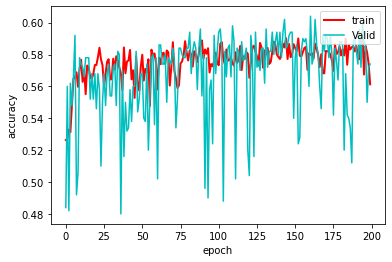

In [35]:
plt.plot(history.history['accuracy'], 'r-', label = 'accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], 'c-',  label='val_accuracy' )
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Valid'], loc='upper right')
plt.show

In [36]:
score, accuracy = model.evaluate(x_test, y_test)
print('Accuracy on Testing data: %.2f' % (accuracy*100))

16/16 [==============================] - 0s 509us/step - loss: 0.6699 - accuracy: 0.5888
Accuracy on Testing data: 58.88


## PART C - Model Optimization - Increasing the Accuracy

### A - Increasing the Features in the Model

#### *We already know how to get the Mean of last 5 games in the Dataset.* 

### *1. We will include new columns in the dataset and find the Mean again.* 

#### *I have already included new columns in the dataset and calculated the Average of last 5 games in CSV file.*

#### *We will just load the new data and Visualize it.*

In [37]:
# Reading Modified Dataset with new columns 

df2 = read_csv('updatedmean_x.csv')
result2 = read_csv('updatedmean_result.csv')
print(result2.shape)
print(df2.shape)
df2

(7356, 1)
(7356, 44)


,TEAMFGM,TEAMFGA,TEAMFG%,TEAM3PM,TEAM3PA,TEAM3P%,TEAM2PA,TEAM2PM,TEAM2P%,TEAMFTM,TEAMFTA,TEAMFT%,TEAMORB,TEAMDRB,TEAMTRB,TEAMAST,TEAMTO%,TEAMSTL,TEAMBLK,TEAMPF,TEAMDAYOFF,TEAMFIC,OPPTFGM,OPPTFGA,OPPTFG%,OPPT3PM,OPPT3PA,OPPT3P%,OPPT2PA,OPPT2PM,OPPT2P%,OPPTFTM,OPPTFTA,OPPTFT%,OPPTORB,OPPTDRB,OPPTTRB,OPPTAST,OPPTTO%,OPPTSTL,OPPTBLK,OPPTPF,OPPTDAYOFF,OPPTFIC
0,32.0,90.0,0.35560,8.0,32.0,0.25000,58.0,24.0,0.41380,12.0,20.0,0.60000,18.0,21.0,39.0,26.0,11.62790,11.0,10.0,19.0,0.0,67.2500,36.0,74.5,0.48295,5.5,13.5,0.40930,61.0,30.5,0.49950,20.0,24.5,0.81545,6.5,32.0,38.5,23.0,16.63270,6.5,3.0,20.5,1.5,68.1875
1,35.0,80.5,0.43600,6.0,18.5,0.36185,62.0,29.0,0.46685,13.5,21.5,0.64005,11.5,37.5,49.0,20.5,17.47320,4.0,7.5,16.0,1.0,65.6875,33.0,86.5,0.38220,4.5,16.5,0.27020,70.0,28.5,0.40760,13.0,16.0,0.81250,11.0,30.5,41.5,15.5,14.92515,8.5,4.5,31.5,1.0,42.7500
2,38.0,75.0,0.50455,7.5,18.0,0.42500,57.0,30.5,0.53270,18.5,22.5,0.82935,6.0,32.5,38.5,21.5,14.70225,6.0,5.0,19.0,1.5,76.1875,32.5,86.0,0.37800,5.5,22.0,0.24570,64.0,27.0,0.42265,11.5,19.0,0.56060,15.5,34.0,49.5,20.5,15.94915,7.0,5.0,19.5,1.0,56.1250
3,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,33.0,91.0,0.36260,6.0,17.0,0.35290,74.0,27.0,0.36490,16.0,19.0,0.84210,15.0,27.0,42.0,18.0,9.14410,12.0,8.0,18.0,0.0,66.8750
4,38.5,74.0,0.52770,3.0,9.5,0.31110,64.5,35.5,0.56045,24.0,31.5,0.76215,9.5,34.0,43.5,27.5,16.63885,7.5,7.0,20.0,1.0,86.1875,36.0,80.5,0.44715,4.5,15.5,0.29620,65.0,31.5,0.48485,15.0,18.5,0.77795,10.5,32.0,42.5,24.5,13.18555,7.0,5.0,18.0,1.0,72.6875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7351,38.8,87.8,0.44146,8.0,27.0,0.29708,60.8,30.8,0.50780,12.2,19.0,0.62942,9.2,35.0,44.2,26.2,11.71512,6.6,5.2,15.4,1.2,77.7750,39.6,83.4,0.47618,10.6,26.2,0.40706,57.2,29.0,0.51046,14.8,18.4,0.82708,8.0,34.0,42.0,27.2,15.10452,7.0,3.8,19.0,1.8,80.9500
7352,46.6,92.0,0.50654,12.2,30.8,0.39534,61.2,34.4,0.55946,14.2,20.4,0.70070,9.4,40.8,50.2,31.2,11.21848,9.4,6.4,20.6,1.6,106.8500,42.6,91.2,0.46954,8.2,24.8,0.32196,66.4,34.4,0.52120,18.4,22.6,0.81638,11.2,35.0,46.2,26.2,10.53934,9.2,4.2,22.0,1.6,89.1750
7353,40.4,85.6,0.47198,5.0,18.4,0.26390,67.2,35.4,0.52786,19.6,27.6,0.69194,13.2,30.8,44.0,23.4,12.55950,6.6,3.4,20.8,1.4,76.1500,37.8,84.4,0.44908,10.0,27.4,0.37056,57.0,27.8,0.48680,19.2,24.6,0.79948,9.0,36.4,45.4,22.6,14.69226,7.2,3.8,21.4,1.4,75.0750
7354,38.0,87.6,0.43570,9.4,32.2,0.29780,55.4,28.6,0.52440,15.2,18.4,0.81384,10.8,35.8,46.6,20.0,13.53398,7.4,2.6,20.0,1.4,70.6500,44.6,84.2,0.53156,12.2,31.8,0.38400,52.4,32.4,0.62152,15.8,23.0,0.69584,9.8,36.0,45.8,29.0,13.73794,8.6,6.0,21.4,1.8,100.1250


### 2. Train Test Split the Data

In [38]:
x_train, x_test, y_train, y_test = train_test_split(df2, result2, test_size=0.068, random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6855, 44)
(501, 44)
(6855, 1)
(501, 1)


### 3. Model's

### <ins>Model 2 - Artificial Neural Network</ins>

In [39]:
# Learning rate
learning_rate = 0.001

# Epoch  
epochs = 300

# Batch size
batch_size = 64

# Optimizer
opt = optimizers.Adam(lr=learning_rate)

#### 2. A - Modifying the input dimention

In [40]:
# Sequential Model

model = Sequential()
model.add(Dense(130, activation='relu', input_dim = 44))
model.add(Dense(1, activation='sigmoid'))

In [41]:
# Complie the model

model.compile(loss='BinaryCrossentropy', optimizer=opt, metrics=['accuracy'])

In [42]:
# Train Test Split 
x_train, x_test, y_train, y_test = train_test_split(df2, result2, test_size=0.068, random_state=2)

# Splitting 500 Rows for Validation Data
x_val = x_train[-500:]
y_val = y_train[-500:]
x_train = x_train[:-500]
y_train = y_train[:-500]

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(6355, 44)
(6355, 1)
(500, 44)
(500, 1)


In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 130)               5850      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 131       
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


#### *2. B - Model Training*

In [44]:
# Model Training

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    verbose = 0
)

In [45]:
a = history.history.get('accuracy')[-1]
print('Accuracy on Training data: %.2f' % (a*100))

Accuracy on Training data: 59.97


<function matplotlib.pyplot.show(close=None, block=None)>

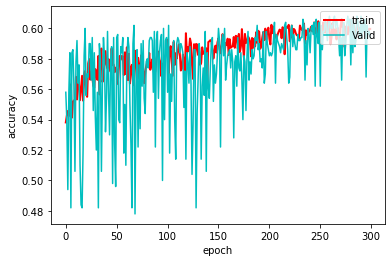

In [46]:
plt.plot(history.history['accuracy'], 'r-', label = 'accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], 'c-',  label='val_accuracy' )
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Valid'], loc='upper right')
plt.show

In [47]:
score, accuracy = model.evaluate(x_test, y_test)
print('Accuracy on Testing data: %.2f' % (accuracy*100))

16/16 [==============================] - 0s 592us/step - loss: 0.6643 - accuracy: 0.5868
Accuracy on Testing data: 58.68


### B - Normalizing the Dataset in the Range of {0,1} with MinMaxScalar()

In [48]:
# Reading Modified Dataset with new columns 

df2 = read_csv('updatedmean_x.csv')
result2 = read_csv('updatedmean_result.csv')
print(result2.shape)
df2.shape
df2

(7356, 1)


,TEAMFGM,TEAMFGA,TEAMFG%,TEAM3PM,TEAM3PA,TEAM3P%,TEAM2PA,TEAM2PM,TEAM2P%,TEAMFTM,TEAMFTA,TEAMFT%,TEAMORB,TEAMDRB,TEAMTRB,TEAMAST,TEAMTO%,TEAMSTL,TEAMBLK,TEAMPF,TEAMDAYOFF,TEAMFIC,OPPTFGM,OPPTFGA,OPPTFG%,OPPT3PM,OPPT3PA,OPPT3P%,OPPT2PA,OPPT2PM,OPPT2P%,OPPTFTM,OPPTFTA,OPPTFT%,OPPTORB,OPPTDRB,OPPTTRB,OPPTAST,OPPTTO%,OPPTSTL,OPPTBLK,OPPTPF,OPPTDAYOFF,OPPTFIC
0,32.0,90.0,0.35560,8.0,32.0,0.25000,58.0,24.0,0.41380,12.0,20.0,0.60000,18.0,21.0,39.0,26.0,11.62790,11.0,10.0,19.0,0.0,67.2500,36.0,74.5,0.48295,5.5,13.5,0.40930,61.0,30.5,0.49950,20.0,24.5,0.81545,6.5,32.0,38.5,23.0,16.63270,6.5,3.0,20.5,1.5,68.1875
1,35.0,80.5,0.43600,6.0,18.5,0.36185,62.0,29.0,0.46685,13.5,21.5,0.64005,11.5,37.5,49.0,20.5,17.47320,4.0,7.5,16.0,1.0,65.6875,33.0,86.5,0.38220,4.5,16.5,0.27020,70.0,28.5,0.40760,13.0,16.0,0.81250,11.0,30.5,41.5,15.5,14.92515,8.5,4.5,31.5,1.0,42.7500
2,38.0,75.0,0.50455,7.5,18.0,0.42500,57.0,30.5,0.53270,18.5,22.5,0.82935,6.0,32.5,38.5,21.5,14.70225,6.0,5.0,19.0,1.5,76.1875,32.5,86.0,0.37800,5.5,22.0,0.24570,64.0,27.0,0.42265,11.5,19.0,0.56060,15.5,34.0,49.5,20.5,15.94915,7.0,5.0,19.5,1.0,56.1250
3,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,33.0,91.0,0.36260,6.0,17.0,0.35290,74.0,27.0,0.36490,16.0,19.0,0.84210,15.0,27.0,42.0,18.0,9.14410,12.0,8.0,18.0,0.0,66.8750
4,38.5,74.0,0.52770,3.0,9.5,0.31110,64.5,35.5,0.56045,24.0,31.5,0.76215,9.5,34.0,43.5,27.5,16.63885,7.5,7.0,20.0,1.0,86.1875,36.0,80.5,0.44715,4.5,15.5,0.29620,65.0,31.5,0.48485,15.0,18.5,0.77795,10.5,32.0,42.5,24.5,13.18555,7.0,5.0,18.0,1.0,72.6875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7351,38.8,87.8,0.44146,8.0,27.0,0.29708,60.8,30.8,0.50780,12.2,19.0,0.62942,9.2,35.0,44.2,26.2,11.71512,6.6,5.2,15.4,1.2,77.7750,39.6,83.4,0.47618,10.6,26.2,0.40706,57.2,29.0,0.51046,14.8,18.4,0.82708,8.0,34.0,42.0,27.2,15.10452,7.0,3.8,19.0,1.8,80.9500
7352,46.6,92.0,0.50654,12.2,30.8,0.39534,61.2,34.4,0.55946,14.2,20.4,0.70070,9.4,40.8,50.2,31.2,11.21848,9.4,6.4,20.6,1.6,106.8500,42.6,91.2,0.46954,8.2,24.8,0.32196,66.4,34.4,0.52120,18.4,22.6,0.81638,11.2,35.0,46.2,26.2,10.53934,9.2,4.2,22.0,1.6,89.1750
7353,40.4,85.6,0.47198,5.0,18.4,0.26390,67.2,35.4,0.52786,19.6,27.6,0.69194,13.2,30.8,44.0,23.4,12.55950,6.6,3.4,20.8,1.4,76.1500,37.8,84.4,0.44908,10.0,27.4,0.37056,57.0,27.8,0.48680,19.2,24.6,0.79948,9.0,36.4,45.4,22.6,14.69226,7.2,3.8,21.4,1.4,75.0750
7354,38.0,87.6,0.43570,9.4,32.2,0.29780,55.4,28.6,0.52440,15.2,18.4,0.81384,10.8,35.8,46.6,20.0,13.53398,7.4,2.6,20.0,1.4,70.6500,44.6,84.2,0.53156,12.2,31.8,0.38400,52.4,32.4,0.62152,15.8,23.0,0.69584,9.8,36.0,45.8,29.0,13.73794,8.6,6.0,21.4,1.8,100.1250


#### 1. Normalizing input data using MinMaxScalar()

In [49]:
scaler = MinMaxScaler()
scaler = scaler.fit(df2)
scaled_data = pd.DataFrame(scaler.transform(df2))
scaled_data.columns = df2.columns
# input = scaled_data
# output = result2
scaled_data

,TEAMFGM,TEAMFGA,TEAMFG%,TEAM3PM,TEAM3PA,TEAM3P%,TEAM2PA,TEAM2PM,TEAM2P%,TEAMFTM,TEAMFTA,TEAMFT%,TEAMORB,TEAMDRB,TEAMTRB,TEAMAST,TEAMTO%,TEAMSTL,TEAMBLK,TEAMPF,TEAMDAYOFF,TEAMFIC,OPPTFGM,OPPTFGA,OPPTFG%,OPPT3PM,OPPT3PA,OPPT3P%,OPPT2PA,OPPT2PM,OPPT2P%,OPPTFTM,OPPTFTA,OPPTFT%,OPPTORB,OPPTDRB,OPPTTRB,OPPTAST,OPPTTO%,OPPTSTL,OPPTBLK,OPPTPF,OPPTDAYOFF,OPPTFIC
0,0.645161,0.865385,0.637985,0.404040,0.650407,0.473664,0.736041,0.6000,0.656846,0.352941,0.483092,0.636578,0.810811,0.495283,0.698925,0.755814,0.574651,0.733333,0.877193,0.640449,0.000000,0.589654,0.380952,0.163580,0.660994,0.210843,0.115196,0.636691,0.585586,0.529126,0.472926,0.511628,0.439394,0.721027,0.150602,0.446602,0.322695,0.420561,0.695436,0.301724,0.176471,0.435897,0.375,0.359160
1,0.705645,0.774038,0.782231,0.303030,0.376016,0.685582,0.786802,0.7250,0.741055,0.397059,0.519324,0.679069,0.518018,0.884434,0.878136,0.595930,0.863526,0.266667,0.657895,0.539326,0.263158,0.575954,0.238095,0.533951,0.161143,0.150602,0.188725,0.333079,0.788288,0.432039,0.153118,0.240310,0.181818,0.713750,0.421687,0.373786,0.429078,0.070093,0.576737,0.474138,0.323529,1.000000,0.250,0.000000
2,0.766129,0.721154,0.905217,0.378788,0.365854,0.805229,0.723350,0.7625,0.845582,0.544118,0.543478,0.879910,0.270270,0.766509,0.689964,0.625000,0.726585,0.400000,0.438596,0.640449,0.394737,0.668018,0.214286,0.518519,0.140306,0.210843,0.323529,0.279603,0.653153,0.359223,0.205491,0.182171,0.272727,0.092358,0.692771,0.543689,0.712766,0.303738,0.647919,0.344828,0.372549,0.384615,0.250,0.188846
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.238095,0.672840,0.063902,0.240964,0.200980,0.513587,0.878378,0.359223,0.004524,0.356589,0.272727,0.786768,0.662651,0.203883,0.446809,0.186916,0.174873,0.775862,0.666667,0.307692,0.000,0.340628
4,0.776210,0.711538,0.946751,0.151515,0.193089,0.589428,0.818528,0.8875,0.889631,0.705882,0.760870,0.808613,0.427928,0.801887,0.779570,0.799419,0.822292,0.500000,0.614035,0.674157,0.263158,0.755699,0.380952,0.348765,0.483380,0.150602,0.164216,0.389829,0.675676,0.577670,0.421945,0.317829,0.257576,0.628521,0.391566,0.446602,0.464539,0.490654,0.455811,0.344828,0.372549,0.307692,0.250,0.422697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7351,0.782258,0.844231,0.792027,0.404040,0.548780,0.562865,0.771574,0.7700,0.806057,0.358824,0.458937,0.667791,0.414414,0.825472,0.792115,0.761628,0.578961,0.440000,0.456140,0.519101,0.315789,0.681938,0.552381,0.438272,0.627406,0.518072,0.426471,0.631802,0.500000,0.456311,0.511066,0.310078,0.254545,0.749716,0.240964,0.543689,0.446809,0.616822,0.589206,0.344828,0.254902,0.358974,0.450,0.539358
7352,0.939516,0.884615,0.908788,0.616162,0.626016,0.749034,0.776650,0.8600,0.888060,0.417647,0.492754,0.743417,0.423423,0.962264,0.899642,0.906977,0.554417,0.626667,0.561404,0.694382,0.421053,0.936870,0.695238,0.679012,0.594463,0.373494,0.392157,0.446055,0.707207,0.718447,0.548441,0.449612,0.381818,0.723321,0.433735,0.592233,0.595745,0.570093,0.271862,0.534483,0.294118,0.512821,0.400,0.655489
7353,0.814516,0.823077,0.846783,0.252525,0.373984,0.500000,0.852792,0.8850,0.837900,0.576471,0.666667,0.734123,0.594595,0.726415,0.788530,0.680233,0.620691,0.440000,0.298246,0.701124,0.368421,0.667690,0.466667,0.469136,0.492955,0.481928,0.455882,0.552134,0.495495,0.398058,0.428731,0.480620,0.442424,0.681632,0.301205,0.660194,0.567376,0.401869,0.560548,0.362069,0.254902,0.482051,0.350,0.456407
7354,0.766129,0.842308,0.781693,0.474747,0.654472,0.564229,0.703046,0.7150,0.832407,0.447059,0.444444,0.863454,0.486486,0.844340,0.835125,0.581395,0.668849,0.493333,0.228070,0.674157,0.368421,0.619465,0.790476,0.462963,0.902163,0.614458,0.563725,0.581469,0.391892,0.621359,0.897550,0.348837,0.393939,0.425971,0

#### 2. Test Train Split the data

In [50]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data, result2, test_size=0.068, random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6855, 44)
(501, 44)
(6855, 1)
(501, 1)


### 3. Model Training on Normalized Data

### <ins>Model 2 - Artificial Neural Network</ins>

In [51]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data, result2, test_size=0.068, random_state=2)

# Learning rate
learning_rate = 0.001

# Epoch  
epochs = 300

# Batch size
batch_size = 64

# Optimizer
opt = optimizers.Adam(lr=learning_rate)

# Sequential Model

model = Sequential()
model.add(Dense(130, activation='relu', input_dim = 44))
model.add(Dense(1, activation='sigmoid'))

# Complie the model

model.compile(loss='BinaryCrossentropy', optimizer=opt, metrics=['accuracy'])

# Train Validation Split
x_val = x_train[-500:]
y_val = y_train[-500:]
x_train = x_train[:-500]
y_train = y_train[:-500]


In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 130)               5850      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 131       
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


Accuracy on Training data: 64.14


<function matplotlib.pyplot.show(close=None, block=None)>

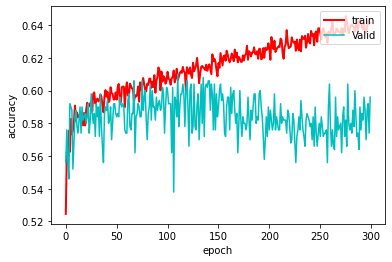

In [53]:
# Model Training

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    verbose = 0
)

a = history.history.get('accuracy')[-1]
print('Accuracy on Training data: %.2f' % (a*100))

plt.plot(history.history['accuracy'], 'r-', label = 'accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], 'c-',  label='val_accuracy' )
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Valid'], loc='upper right')
plt.show

In [54]:
score, accuracy = model.evaluate(x_test, y_test)
print('Accuracy on Testing data: %.2f' % (accuracy*100))

16/16 [==============================] - 0s 603us/step - loss: 0.6671 - accuracy: 0.6267
Accuracy on Testing data: 62.67


### C - PCA Analysis and Dimentionality Reduction of Data

### 1. Loading the Dataset

In [55]:
# Reading Modified Dataset with new columns 

df3 = read_csv('updatedmean_x.csv')
result3 = read_csv('updatedmean_result.csv')
print(result3.shape)
df3.shape
# Input - df3
# Output - result3

(7356, 1)


(7356, 44)

#### 2. Normalizing Data

In [56]:
scaler = MinMaxScaler()
scaler = scaler.fit(df3)
scaled_data1 = pd.DataFrame(scaler.transform(df3))
scaled_data1.columns = df3.columns
# input = scaled_data1
# output = result3

#### 3. PCA Analysis on Normalized input data

PCA Analysis below is used to find the Explained Variance of each individual features and also Cumulative Explained Variance

of each component cumulative with each component above in the table.

Usage - We can reduce the dimentionality of our data if we have too many numbers of features which will help in memory computation

Right now we do not have much columns but we can include multiple new columns from RAW data and then use Dimentionality Reduction to get a Model which can

be computationally efficient.

In our case - On 24th Row in the below table we can see the Cumulative Variance is \~98%. This implies that we can reduce the total feature of the

Model from 44 to 24 with just 2% loss of information.

In [57]:
n_components = scaled_data1.shape[1]
pca = PCA(n_components = n_components)
pca.fit(scaled_data1)

explained_variance_ratio = pca.explained_variance_ratio_ 
cum_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
components_ = pca.components_ 
lst = []
for i in range (0, n_components):
    lst.append([i+1, round(explained_variance_ratio[i],6), cum_explained_variance_ratio[i]])
pca_predictor = pd.DataFrame(lst)
pca_predictor.columns = ['Component', 'Explained Variance', 'Cumulative Explained Variance']
pca_predictor

,Component,Explained Variance,Cumulative Explained Variance
0,1,0.172388,0.172388
1,2,0.114555,0.286943
2,3,0.089625,0.376568
3,4,0.065819,0.442387
4,5,0.061475,0.503862
5,6,0.046904,0.550765
6,7,0.040643,0.591408
7,8,0.039981,0.631389
8,9,0.036595,0.667983
9,10,0.034114,0.702098


In [58]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data1, result3, test_size=0.2, random_state=2)

#### 4. Feature Importance

Decision Tree Classifier is used to find the Important Features, In the below Graph we can see almost 23\~24 features have impact or

importance in the information and rest all features are contributing almost nothing to Model. 

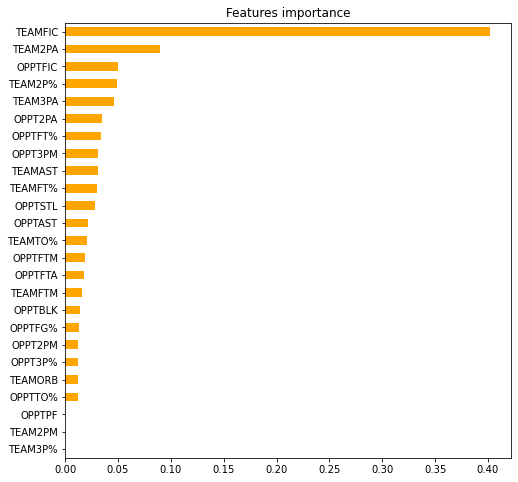

In [59]:
dt_model_1 = DecisionTreeClassifier(min_samples_leaf=3, min_weight_fraction_leaf=0.01, max_leaf_nodes=40).fit(x_train, y_train)
plt.figure(figsize=(8,8))
pd.Series(dt_model_1.feature_importances_, index=x_train.columns).sort_values().tail(25)\
    .plot.barh(title='Features importance',color="orange");

#### 4. Dimentionality Reduction to 24 Features

We will try to reduce the feature dimension from 44 to 24 and check the accuracy of the Model. 

In [60]:
pca = PCA(n_components=24)
pca = pca.fit(scaled_data1)
pca_transformed = pca.fit_transform(scaled_data1)
pca_transformed.shape

# Input - pca_transformed
# output - result3
pca_transformed[:5]

array([[-1.69338568e-01,  2.45497991e-02, -4.48525064e-01,
         7.86557248e-02, -1.98594199e-01, -2.22923955e-01,
         2.50604645e-01,  1.87233970e-01,  7.64004436e-02,
        -3.74209222e-01,  9.74643823e-02,  2.16037763e-01,
        -2.77911376e-02,  3.98030934e-01, -9.89292789e-03,
         3.34023846e-01,  4.44393252e-01, -6.41701392e-02,
        -1.54748880e-01,  2.84896108e-01,  1.43710707e-01,
        -2.42421832e-01,  5.57537032e-02,  1.60828820e-01],
       [-8.69357242e-01, -1.44967287e-02,  7.14155386e-02,
         1.64893478e-01,  1.68786851e-01,  1.69851009e-01,
         2.29050704e-01, -8.74556566e-03,  9.54286030e-02,
        -2.98058911e-01,  2.73250505e-01,  4.98114425e-01,
         1.05534603e-01,  2.45273048e-01,  2.40525546e-01,
        -2.79589277e-01, -1.02311269e-02,  2.30848262e-01,
         5.25086402e-02, -1.48246848e-01, -4.72348616e-03,
         6.83368099e-02,  1.52066123e-01,  9.67499197e-02],
       [-6.53207847e-01,  5.09251410e-02,  4.28391817e

### 5. Model Implementations

### <ins>Model 2 - Artificial Neural Network</ins>

In [61]:
x_train, x_test, y_train, y_test = train_test_split(pca_transformed, result3, test_size=0.068, random_state=2)

# Learning rate
learning_rate = 0.001

# Epoch  
epochs = 30

# Batch size
batch_size = 64

# Optimizer
opt = optimizers.Adam(lr=learning_rate)

# Sequential Model

model = Sequential()
model.add(Dense(130, activation='relu', input_dim = 24))
model.add(Dense(1, activation='sigmoid'))

# Complie the model

model.compile(loss='BinaryCrossentropy', optimizer=opt, metrics=['accuracy'])

# Train Validation Split
x_val = x_train[-500:]
y_val = y_train[-500:]
x_train = x_train[:-500]
y_train = y_train[:-500]

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 130)               3250      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 131       
Total params: 3,381
Trainable params: 3,381
Non-trainable params: 0
_________________________________________________________________


Accuracy on Training data: 64.23


<function matplotlib.pyplot.show(close=None, block=None)>

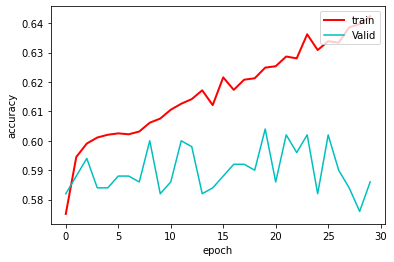

In [62]:
# Model Training

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    verbose = 0
)

a = history.history.get('accuracy')[-1]
print('Accuracy on Training data: %.2f' % (a*100))

plt.plot(history.history['accuracy'], 'r-', label = 'accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], 'c-',  label='val_accuracy' )
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Valid'], loc='upper right')
plt.show

In [63]:
score, accuracy = model.evaluate(x_test, y_test)
print('Accuracy on Testing data: %.2f' % (accuracy*100))

16/16 [==============================] - 0s 661us/step - loss: 0.6851 - accuracy: 0.6148
Accuracy on Testing data: 61.48
